# **Stage 3 - Machine Learning Evaluation &  Supervised Learning**

**SRIKANDI 8B**
Nama Anggota:<br>
- Callista Levina Dotulong<br>
- Dwi Nur Indah Sari<br>
- Meita Palupi Fitria <br>
- Latifa Nur Safitri<br>
- Lisa Rohmatul Ullah
- Sabrina Nur Halisa<br>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 1. Modeling
Lakukan modeling sesuai task yang ditentukan di awal dari hasil data yang telah dilakukan
preprocessing dan cleaning pada tahapan sebelumnya:<br>
A. Split Data Train & Test <br>
B. Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)<br>
C. Model Evaluation: Pemilihan dan perhitungan metrics model<br>
D. Model Evaluation: Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi
dengan cross-validation<br>
E. Hyperparameter Tuning<br>

## **A. Split Data Train & Test**

In [ ]:
import pandas as pd
df = pd.read_csv('E_Commerce_2.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,E wallet,UPI,Male,Grocery,Laptop & Accessory,Mobile,Mobile Phone.1,Others,Married,Single
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,...,0,1,1,0,0,1,0,0,0,1
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,0,0,1,0,1,0,0,0,0,1
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df = df.drop(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'CustomerID'], axis=1)

In [ ]:
X = df.drop(['Churn'],axis=1)
y = df['Churn']

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

Dengan Menggunakan kode tersebut kami memanfaatkan penggunaan library Pandas dan Scikit-Learn untuk memproses dan membagi data menjadi data pelatihan(train) dan data pengujian(test)

## **B. Modeling**

Kami menggunakan 2 jenis modeling sebagai bahan perbandingan yaitu Logistic Regression dan Random Forest

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Latih model menggunakan data latih
model.fit(X_train, y_train)

LogisticRegression()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Latih model menggunakan data latih
rf_model.fit(X_train, y_train)


RandomForestClassifier()

Dalam kode di atas, Kami menginisialisasi model Regresi Logistik dan Random Forest dari Library Scikit-Learn dan kemudian melatihnya menggunakan data train (X_train dan y_train). alasan kami menggunakan Regresi Logistik dan Rando Forest adalah karena merupakan algoritma model yang dapat digunakan untuk masalah klasifikasi, dan dengan ini akan mencoba mempelajari hubungan antara fitur-fitur dalam X_train dan target klasifikasi yang miliki dalam y_train dalam hal ini 'Churn'.

## **C. Model Evaluation: Pemilihan dan perhitungan metrics model**


Setelah melatih model dengan perintah model.fit(X_train, y_train), kami menggunakan model tersebut untuk membuat prediksi pada data pengujian (X_test) dengan menggunakan perintah model.predict(X_test). Kami juga mengevaluasi kinerja model dengan metrik evaluasi F1-score

In [ ]:
from sklearn.metrics import recall_score, f1_score

# Buat prediksi menggunakan model
y_pred = model.predict(X_test)

# Menghitung metrik Recall
recall = recall_score(y_test, y_pred)
print("Recall Logistic Regression: {:.2f}".format(recall))

Recall Logistic Regression: 0.49


Jika recall untuk masalah churn sebesar 0.49, ini berarti model mungkin tidak dapat mendeteksi sekitar setengah dari pelanggan yang sebenarnya akan berhenti menggunakan produk atau layanan. Dalam konteks ini, semakin tinggi recall, semakin baik model dalam mengidentifikasi pelanggan yang berpotensi berhenti (churn).

Dalam konteks churn, kehilangan pelanggan dapat memiliki dampak finansial yang signifikan bagi E-Commerce. Oleh karena itu, biasanya akan lebih penting untuk mengidentifikasi dengan baik pelanggan yang benar-benar akan berhenti (true positives) untuk mengambil tindakan pencegahan atau retensi.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Latih model menggunakan data latih
rf_model.fit(X_train, y_train)

# Buat prediksi menggunakan model Random Forest
y_pred_rf = rf_model.predict(X_test)

# Menghitung metrik Recall
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall Random Forest: {:.2f}".format(recall_rf))

Recall Random Forest: 0.79


Recall sebesar 0.78 dalam konteks churn dapat dianggap sebagai nilai yang baik. Ini menunjukkan bahwa model Random Forest  mampu mengidentifikasi sebagian besar pelanggan yang sebenarnya akan berhenti menggunakan produk atau layanan. Recall yang tinggi dalam konteks churn berarti bahwa model cenderung mengurangi jumlah kesalahan "false negatives" (pelanggan yang sebenarnya berhenti tetapi tidak terdeteksi).

Melihat dari besarnya recall dari masing-masing model dengan Logistic Reggression sebesar 0.49 dan Random Forest sebesar 0.78. Maka, kami memustuskan untuk menggunakan Random Forest dalam melakukan Modeling

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Latih model menggunakan data latih
rf_model.fit(X_train, y_train)

# Buat prediksi menggunakan model Random Forest pada data uji
y_pred_rf = rf_model.predict(X_test)

# Hitung confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Tampilkan confusion matrix
print("Confusion Matrix Random Forest:")
print(conf_matrix_rf)


Confusion Matrix Random Forest:
[[1551   17]
 [  64  245]]


## **D. Model Evaluation: Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi dengan cross-validation**

Berdasarkan metrics evaluation sebelumnya serta penggambaran menggunakan confusion matrix terlihat bahwa model yang kita miliki belum best-fit. terjadi ketidakseimbangan data yang cukup besar. dengan score F1-score yang rendah yaitu 0.59 mengindikasikan bahwa baik Presisi maupun Recall adalah rendah, yang artinya model Anda dapat membuat banyak kesalahan dalam mengklasifikasikan pelanggan churn.



**Learning Curves**

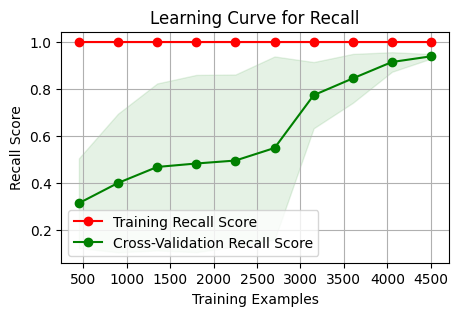

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, recall_score

def plot_learning_curve_recall(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes,
        scoring=make_scorer(recall_score, pos_label=1))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(5, 3))
    plt.title("Learning Curve for Recall")
    plt.xlabel("Training Examples")
    plt.ylabel("Recall Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Recall Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Recall Score")

    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Gantilah model dengan rf_model, dan pastikan X, y, dan cv sudah terdefinisi sebelumnya
plot_learning_curve_recall(rf_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))


Berdasarkan Learning Curve yang diamati, dapat disimpulkan bahwa model yang kami kembangkan telah mencapai titik di mana peningkatan performa tambahan atau kompleksitas model mungkin tidak lagi diperlukan. Learning Curve tersebut menunjukkan bahwa model cenderung stabil dan sudah mampu menggeneralisasi dengan baik terhadap data churn. Oleh karena itu, dapat dianggap bahwa model telah mencapai tingkat "best-fit", di mana peningkatan lebih lanjut dalam pelatihan mungkin tidak signifikan atau bahkan dapat menyebabkan overfitting.

Evaluasi metrics sebelumnya menunjukkan bahwa fokus kami pada recall bertujuan untuk mengurangi false negatives. Alasan pemilihan recall sebagai metrik evaluasi adalah untuk memantau peningkatan yang mungkin terjadi pada recall, dengan tujuan mengurangi jumlah false negatives. sebagai tambahan informasi kami melakukan Cross-Validation (F1 Score) untuk setiap lipatan:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Misalkan Anda memiliki model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Misalkan X_train dan y_train adalah data pelatihan dan labelnya
X_train, y_train = X_train, y_train
# Lakukan cross-validation dengan 5 lipatan
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')

# Menampilkan hasil cross-validation
print("Hasil Cross-Validation (F1 Score) untuk setiap lipatan:")
print(cv_scores)
print("Rata-rata F1 Score: {:.2f}".format(cv_scores.mean()))


Hasil Cross-Validation (F1 Score) untuk setiap lipatan:
[0.75925926 0.79824561 0.78787879 0.79646018 0.83116883]
Rata-rata F1 Score: 0.79


## **E. Hyperparameter Tuning**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Membuat daftar hyperparameter yang akan dijelajahi
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

hyperparameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=1)

# Membuat objek RandomizedSearchCV
rs = RandomizedSearchCV(rf_model, hyperparameters, n_iter=50, scoring='roc_auc', random_state=1, cv=5)

# Melatih model pada data pelatihan
rs.fit(X_train, y_train)
# Evaluasi model dengan metrik ROC AUC atau metrik lain yang sesuai
eval_classification(rs)

F1-Score (Test Set): 0.89
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00


Secara keseluruhan, skor F1 yang tinggi dan ROC AUC yang tinggi pada data uji adalah tanda positif, menunjukkan bahwa model memiliki performa yang baik dalam mengidentifikasi pelanggan yang mungkin akan churn.

**Check the best hyperparameter after tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Contoh dataset (gantilah dengan dataset sesuai kebutuhan Anda)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Model RandomForestClassifier
rf = RandomForestClassifier()

# Grid dari hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Melakukan penyetelan hyperparameter
grid_search.fit(X, y)

# Mendapatkan parameter terbaik setelah tuning
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Kombinasi hyperparameter ini dianggap sebagai kombinasi terbaik yang memberikan performa yang optimal pada metrik evaluasi yang dipilih (dalam hal ini, F1-Score). Penyetelan ini membantu model Random Forest untuk memberikan keseimbangan yang baik antara ketepatan dan recall, serta mencegah overfitting.

# 2. Feature Importance
- Evaluasi feature yang paling penting,<br>
- Tarik business insight-nya, <br>
- Berikan action items berupa rekomendasi terhadap insight tersebut<br>


In [ ]:
# Memanggil X.columns untuk mendapatkan nama kolom
column_names = X.columns

# Menampilkan nama kolom
print(column_names)


Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Mobile Phone', 'Phone', 'COD',
       'Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI',
       'Male', 'Grocery', 'Laptop & Accessory', 'Mobile', 'Mobile Phone.1',
       'Others', 'Married', 'Single'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_names = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Mobile Phone', 'Phone', 'COD',
       'Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI',
       'Male', 'Grocery', 'Laptop & Accessory', 'Mobile', 'Mobile Phone.1',
       'Others', 'Married', 'Single']

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melatih model pada data pelatihan
rf_model.fit(X_train, y_train)

# Mendapatkan pentingnya fitur
feature_importance = rf_model.feature_importances_

# Menampilkan hasil pentingnya fitur dengan nama asli
for i, importance in enumerate(feature_importance):
    print(f"{feature_names[i]}: {importance}")


Tenure: 0.20030227665717654
CityTier: 0.025721287455247065
WarehouseToHome: 0.07469059650435048
HourSpendOnApp: 0.02003313399204302
NumberOfDeviceRegistered: 0.03743055589927194
SatisfactionScore: 0.048543315379554516
NumberOfAddress: 0.0606177375867064
Complain: 0.06613741852065141
OrderAmountHikeFromlastYear: 0.058033650643924906
CouponUsed: 0.02880901258067547
OrderCount: 0.032157153661173866
DaySinceLastOrder: 0.0670825985896023
CashbackAmount: 0.09193958933842
Mobile Phone: 0.014405905513514252
Phone: 0.011923493576113246
COD: 0.009351879241571806
Cash on Delivery: 0.003921392336623555
Credit Card: 0.012322831060619275
Debit Card: 0.015290140122928087
E wallet: 0.01140951856885459
UPI: 0.006311905012935458
Male: 0.01742880413685769
Grocery: 0.003043661684793556
Laptop & Accessory: 0.014387319549640896
Mobile: 0.00862145902498725
Mobile Phone.1: 0.016986334322752962
Others: 0.0011446658983669058
Married: 0.01380841665756371
Single: 0.02814394648307883


In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=column_names)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

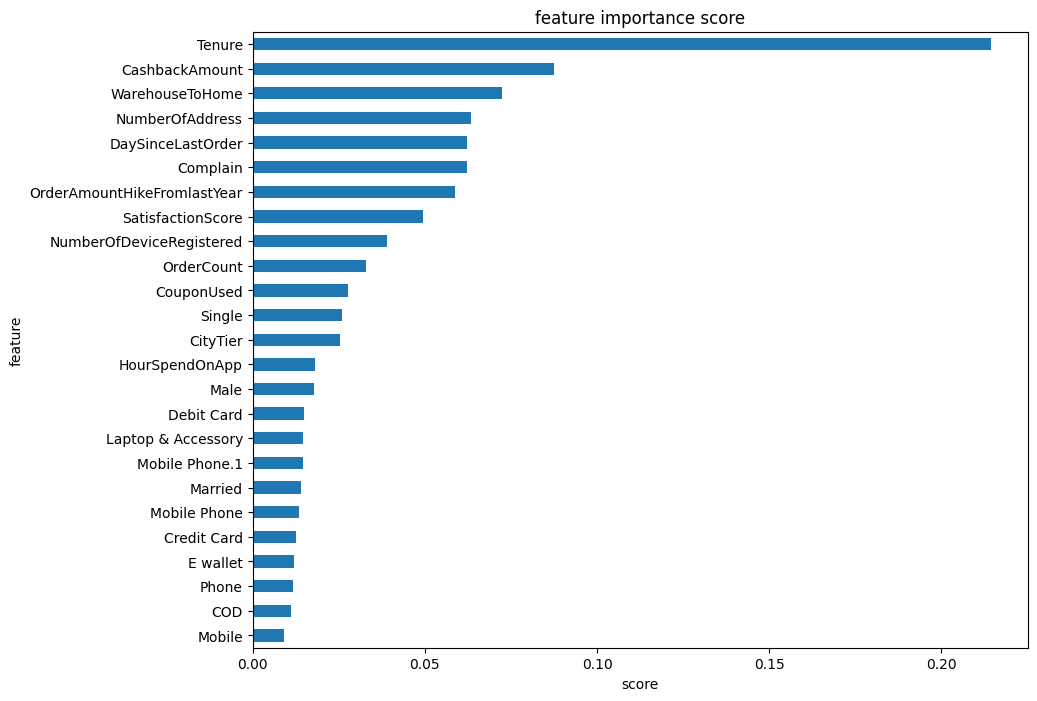

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)  # Melatih model RandomForestClassifier
show_feature_importance(rf)  # Menampilkan fitur penting


In [ ]:
pip install shap

In [ ]:
import shap

# Inisialisasi explainer dari SHAP
explainer = shap.TreeExplainer(rf_model)

# Hitung SHAP values untuk setiap observasi dalam X_train
shap_values = explainer.shap_values(X_train)


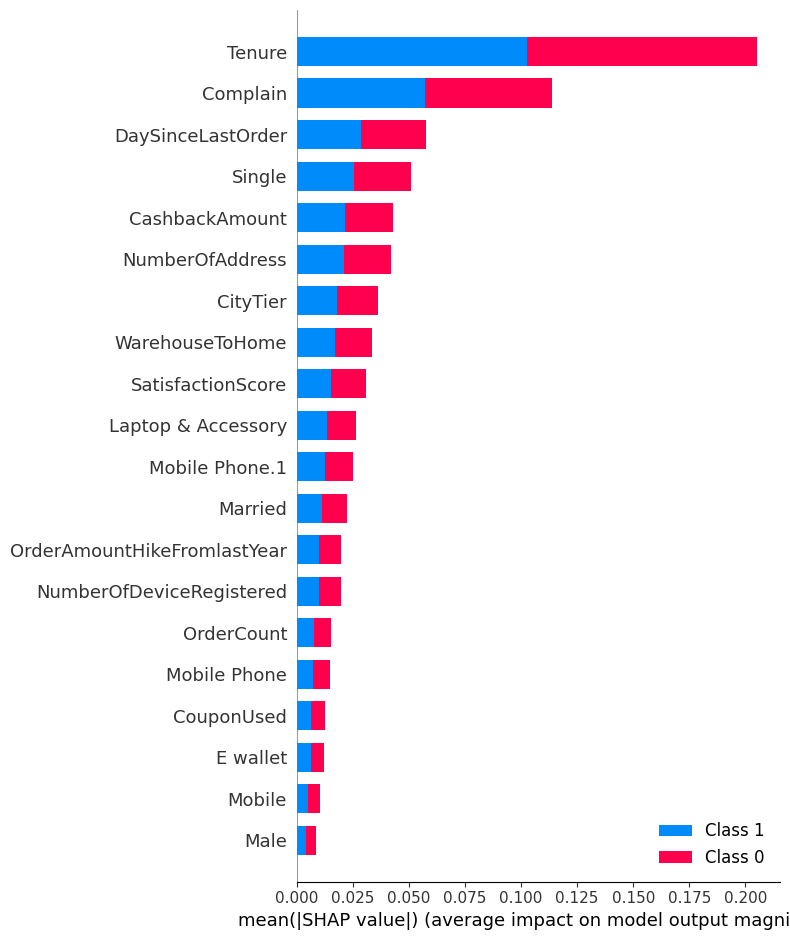

In [ ]:
# Inisialisasi explainer dari SHAP menggunakan TreeExplainer
explainer = shap.TreeExplainer(rf_model)

# Hitung SHAP values untuk setiap observasi dalam X_train
shap_values = explainer.shap_values(X_train)

# Tampilkan ringkasan plot SHAP untuk semua fitur
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

# Pilih satu observasi (gantilah dengan indeks yang sesuai)
sample_index = 0

# Tampilkan plot SHAP force untuk satu observasi
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_index, :], X_train.iloc[sample_index, :], feature_names=feature_names)


**Business Insight**

1. Feature Tenure memiliki pengaruh yang paling signifikan (0.2049): Ini menunjukkan bahwa Feature 2 adalah fitur yang paling penting dalam membuat prediksi. kita dapat melakukan Penekanan pada Retensi Pelanggan. Karena, jika tenure memiliki pengaruh yang tinggi, ini menunjukkan bahwa lamanya tinggal pelanggan dalam layanan Anda memiliki dampak besar pada keputusan pelanggan untuk bertahan atau pergi. Bisnis Anda mungkin ingin lebih memfokuskan upaya pada retensi pelanggan dengan mengidentifikasi pelanggan dengan tenure rendah dan mencoba untuk meningkatkan tingkat retensi mereka.

2. Feature CashbackAmount juga memiliki pengaruh yang signifikan (0.0905)Feature ini juga cukup penting dalam membuat prediksi.jika "cashback amount" berkontribusi besar dalam prediksi, E-commerce dapat mempertimbangkan untuk meningkatkan atau menyesuaikan program cashback  untuk mendapatkan lebih banyak pelanggan atau mempertahankan pelanggan yang ada.

3. Feature DaySinceLastOrder dapat digunakan sebagai indikator penting dalam memprediksi perilaku pelanggan atau keputusan mereka untuk bertahan atau pergi. Informasi ini dapat membantu untuk memahami betapa pentingnya retensi pelanggan yang sering melakukan pemesanan dan merencanakan strategi retensi yang lebih efektif, seperti mengirimkan penawaran khusus kepada pelanggan dengan DaySinceLastOrder yang lebih lama atau memberikan insentif khusus untuk memicu pemesanan ulang.

4. Feature NumberOfAddress: Jumlah alamat yang dimiliki oleh pelanggan dapat menjadi faktor penting dalam memprediksi perilaku pelanggan atau keputusan mereka. Informasi ini dapat membantu untuk memahami bagaimana variasi jumlah alamat dapat memengaruhi retensi pelanggan serta sebagai kriteria untuk mengelompokkan pelanggan ke dalam kelompok yang berbeda. Pelanggan dengan jumlah alamat yang berbeda mungkin memiliki preferensi atau kebutuhan yang berbeda.

5. Feature Complain: kita dapat melakukan analisis lebih lanjut untuk memahami jenis keluhan apa yang paling umum dan apa yang paling memengaruhi keputusan pelanggan. Ini dapat membantu untuk mengidentifikasi hal-hal yang membutuhkan perbaikan. perusahaan dapat melakukan Pelatihan karyawan dalam menangani keluhan pelanggan dengan baik dan memberikan solusi yang memuaskan adalah faktor penting dalam mempertahankan pelanggan. Ini dapat membantu mengurangi tingkat keluhan dan meningkatkan retensi pelanggan.

**Action Items**

1. Feature Tenure:
- Identifikasi pelanggan dengan tenure yang rendah dan berikan insentif khusus untuk memperpanjang lamanya tinggal mereka.
- Tawarkan program loyalitas atau keuntungan khusus kepada pelanggan yang telah setia selama periode yang lama.
- Monitor dan evaluasi faktor-faktor yang mempengaruhi pelanggan dengan tenure rendah untuk mengidentifikasi cara meningkatkan retensi mereka.

2. Cashback Amount:
- Evaluasi program cashback yang ada dan pertimbangkan untuk meningkatkan atau menyesuaikan insentif cashback untuk pelanggan.
- Analisis dampak dari perubahan cashback terhadap retensi pelanggan dan ROI.
- Berikan informasi yang jelas kepada pelanggan tentang program cashback dan manfaatnya untuk memotivasi mereka untuk tetap menggunakan layanan Anda.

3. Day Since Last Order (Lama Waktu Sejak Pesanan Terakhir):
- Identifikasi pelanggan dengan lama waktu sejak pesanan terakhir yang tinggi dan kirimkan penawaran khusus atau insentif untuk mendorong pemesanan ulang.
- Pantau tren lama waktu pesanan dan tindak lanjuti perubahan dalam perilaku pelanggan.
- Pastikan bahwa layanan pelanggan atau dukungan tersedia untuk membantu pelanggan yang mungkin memiliki hambatan dalam melakukan pemesanan.

4. Number of Address (Jumlah Alamat):
- Gunakan informasi ini untuk mengkategorikan pelanggan ke dalam kelompok berdasarkan jumlah alamat mereka dan pertimbangkan strategi yang berbeda untuk setiap kelompok.
- Analisis apakah jumlah alamat memengaruhi kebutuhan atau preferensi pelanggan, dan sesuaikan tawaran produk atau layanan sesuai dengan kelompok pelanggan.

5. Complain (Keluhan):
- Lakukan analisis lebih mendalam tentang jenis keluhan yang paling umum dan penyebab utama keluhan pelanggan.
- Tingkatkan pelatihan karyawan dalam menangani keluhan dan memberikan solusi yang memuaskan.
- Evaluasi kebijakan dan prosedur pengelolaan keluhan Anda dan pastikan mereka efektif dalam mengurangi keluhan.